In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [ ]:
Multiple = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Existence_Analysis/PER_PBR_FY1.csv')

<ipython-input-3-c16c9404a01b>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  Multiple = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Existence_Analysis/PER_PBR_FY1.csv')


In [ ]:
Multiple

,TICKER,CUSIP,OFTIC,CNAME,FPI,MEASURE,VALUE,CURR,FPEDATS,ANNDATS,ACTUAL,report_curr
0,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.73,NaN,2014-12-31,2014-03-09,1.21,USD
1,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.83,NaN,2014-12-31,2014-03-10,1.21,USD
2,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.66,NaN,2014-12-31,2014-03-10,1.21,USD
3,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.80,NaN,2014-12-31,2014-03-10,1.21,USD
4,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.86,NaN,2014-12-31,2014-03-17,1.21,USD
...,...,...,...,...,...,...,...,...,...,...,...,...
13854952,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,BPS,13.03,CAD,2023-12-31,2023-04-10,NaN,CAD
13854953,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,BPS,13.01,CAD,2023-12-31,2023-05-09,NaN,CAD
13854954,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,BPS,12.59,CAD,2023-12-31,2023-08-11,NaN,CAD
13854955,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,BPS,12.51,CAD,2023-12-31,2023-10-02,NaN,CAD


# 해외주식 PER, PBR 정제

In [ ]:
Multiple['CURR'] = Multiple['CURR'].fillna(Multiple['report_curr'])

In [ ]:
EPS = Multiple[Multiple['MEASURE']=='EPS']
BPS = Multiple[Multiple['MEASURE']=='BPS']

In [ ]:
EPS

,TICKER,CUSIP,OFTIC,CNAME,FPI,MEASURE,VALUE,CURR,FPEDATS,ANNDATS,ACTUAL,report_curr
0,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.73,USD,2014-12-31,2014-03-09,1.21,USD
1,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.83,USD,2014-12-31,2014-03-10,1.21,USD
2,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.66,USD,2014-12-31,2014-03-10,1.21,USD
3,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.80,USD,2014-12-31,2014-03-10,1.21,USD
4,0000,87482X10,TLMR,TALMER BANCORP,1,EPS,0.86,USD,2014-12-31,2014-03-17,1.21,USD
...,...,...,...,...,...,...,...,...,...,...,...,...
10516915,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,EPS,2.06,CAD,2023-12-31,2023-11-10,NaN,CAD
10516916,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,EPS,2.08,CAD,2023-12-31,2023-11-12,NaN,CAD
10516917,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,EPS,2.13,CAD,2023-12-31,2023-11-12,NaN,CAD
10516918,ZZZ,83125J10,ZZZ,SLEEP COUNTRY CA,1,EPS,2.06,CAD,2023-12-31,2023-11-14,NaN,CAD


In [ ]:
EPS = EPS.dropna(subset=['report_curr'])
EPS = EPS[EPS.report_curr != 'nan']
BPS = BPS.dropna(subset=['report_curr'])
BPS = BPS[BPS.report_curr != 'nan']

In [ ]:
EPS_FWD = pd.DataFrame(EPS.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR'])['VALUE'].mean()).reset_index()
is_serial = EPS_FWD['FPEDATS'].astype("str").str.isdigit()
from_serial = pd.to_timedelta(EPS_FWD.loc[is_serial,"FPEDATS"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(EPS_FWD.loc[~is_serial,"FPEDATS"])
EPS_FWD["FPEDATS"] = pd.concat([from_serial,from_string])
EPS_FWD['Quarter'] = EPS_FWD['FPEDATS'].dt.to_period('Q').astype('str')
EPS_FWD = pd.DataFrame(EPS_FWD.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR','Quarter'])['VALUE'].mean()).reset_index()
EPS_FWD.rename(columns={'TICKER':'ticker','OFTIC':'TICKER'},inplace=True)
EPS_FWD = EPS_FWD[['TICKER','CURR','Quarter','VALUE']]
EPS_FWD

,TICKER,CURR,Quarter,VALUE
0,TLMR,USD,2014Q4,0.868621
1,TLMR,USD,2015Q4,0.857647
2,TLMR,USD,2016Q4,1.201111
3,EPE,USD,2013Q4,1.063125
4,EPE,USD,2014Q4,0.905603
...,...,...,...,...
456524,ZZZ,CAD,2019Q4,1.697556
456525,ZZZ,CAD,2020Q4,1.210652
456526,ZZZ,CAD,2021Q4,2.221707
456527,ZZZ,CAD,2022Q4,2.993902


In [ ]:
EPS_TRA = EPS.dropna(subset=['ACTUAL'])
EPS_TRA = pd.DataFrame(EPS_TRA.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR'])['ACTUAL'].mean()).reset_index()
is_serial = EPS_TRA['FPEDATS'].astype("str").str.isdigit()
from_serial = pd.to_timedelta(EPS_TRA.loc[is_serial,"FPEDATS"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(EPS_TRA.loc[~is_serial,"FPEDATS"])
EPS_TRA["FPEDATS"] = pd.concat([from_serial,from_string])
EPS_TRA['Quarter'] = EPS_TRA['FPEDATS'].dt.to_period('Q').astype('str')
EPS_TRA = pd.DataFrame(EPS_TRA.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR','Quarter'])['ACTUAL'].mean()).reset_index()
EPS_TRA.rename(columns={'TICKER':'ticker','OFTIC':'TICKER'},inplace=True)
EPS_TRA = EPS_TRA[['TICKER','CURR','Quarter','ACTUAL']]
EPS_TRA

,TICKER,CURR,Quarter,ACTUAL
0,TLMR,USD,2014Q4,1.21
1,TLMR,USD,2015Q4,1.02
2,EPE,USD,2013Q4,-0.28
3,EPE,USD,2014Q4,0.86
4,EPE,USD,2015Q4,0.78
...,...,...,...,...
397804,ZZZ,CAD,2018Q4,1.71
397805,ZZZ,CAD,2019Q4,1.59
397806,ZZZ,CAD,2020Q4,1.95
397807,ZZZ,CAD,2021Q4,2.64


In [ ]:
BPS_FWD = pd.DataFrame(BPS.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR'])['VALUE'].mean()).reset_index()
is_serial = BPS_FWD['FPEDATS'].astype("str").str.isdigit()
from_serial = pd.to_timedelta(BPS_FWD.loc[is_serial,"FPEDATS"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(BPS_FWD.loc[~is_serial,"FPEDATS"])
BPS_FWD["FPEDATS"] = pd.concat([from_serial,from_string])
BPS_FWD['Quarter'] = BPS_FWD['FPEDATS'].dt.to_period('Q').astype('str')
BPS_FWD = pd.DataFrame(BPS_FWD.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR','Quarter'])['VALUE'].mean()).reset_index()
BPS_FWD.rename(columns={'TICKER':'ticker','OFTIC':'TICKER'},inplace=True)
BPS_FWD = BPS_FWD[['TICKER','CURR','Quarter','VALUE']]
BPS_FWD

,TICKER,CURR,Quarter,VALUE
0,TLMR,USD,2014Q4,10.516364
1,TLMR,USD,2015Q4,11.175854
2,TLMR,USD,2016Q4,12.047000
3,EPE,USD,2013Q4,14.216000
4,EPE,USD,2014Q4,15.249667
...,...,...,...,...
297246,ZZZ,CAD,2019Q4,8.215000
297247,ZZZ,CAD,2020Q4,9.027273
297248,ZZZ,CAD,2021Q4,10.772308
297249,ZZZ,CAD,2022Q4,11.928824


In [ ]:
BPS_TRA = BPS.dropna(subset=['ACTUAL'])
BPS_TRA = pd.DataFrame(BPS_TRA.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR'])['ACTUAL'].mean()).reset_index()
is_serial = BPS_TRA['FPEDATS'].astype("str").str.isdigit()
from_serial = pd.to_timedelta(BPS_TRA.loc[is_serial,"FPEDATS"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(BPS_TRA.loc[~is_serial,"FPEDATS"])
BPS_TRA["FPEDATS"] = pd.concat([from_serial,from_string])
BPS_TRA['Quarter'] = BPS_TRA['FPEDATS'].dt.to_period('Q').astype('str')
BPS_TRA = pd.DataFrame(BPS_TRA.groupby(['TICKER','CUSIP','OFTIC','FPEDATS','CURR','Quarter'])['ACTUAL'].mean()).reset_index()
BPS_TRA.rename(columns={'TICKER':'ticker','OFTIC':'TICKER'},inplace=True)
BPS_TRA = BPS_TRA[['TICKER','CURR','Quarter','ACTUAL']]
BPS_TRA

,TICKER,CURR,Quarter,ACTUAL
0,TLMR,USD,2014Q4,10.8000
1,TLMR,USD,2015Q4,10.9700
2,EPE,USD,2013Q4,14.0200
3,EPE,USD,2014Q4,17.6800
4,EPE,USD,2015Q4,2.4960
...,...,...,...,...
250923,ZZZ,CAD,2018Q4,8.2000
250924,ZZZ,CAD,2019Q4,8.3377
250925,ZZZ,CAD,2020Q4,9.7700
250926,ZZZ,CAD,2021Q4,10.9494


In [ ]:
Stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Existence_Analysis/Stock_info.csv')
Stock

<ipython-input-13-605a362a7247>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  Stock = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Existence_Analysis/Stock_info.csv')


,PERMNO,date,SHRCD,NCUSIP,TICKER,COMNAM,SHRCLS,PERMCO,ISSUNO,CUSIP,PRC,SHROUT
0,10001,2002-01-31,11.0,29274A10,EWST,ENERGY WEST INC,NaN,7953,10398,36720410,11.30000,2566.0
1,10001,2002-02-28,11.0,29274A10,EWST,ENERGY WEST INC,NaN,7953,10398,36720410,10.70000,2569.0
2,10001,2002-03-28,11.0,29274A10,EWST,ENERGY WEST INC,NaN,7953,10398,36720410,10.40000,2571.0
3,10001,2002-04-30,11.0,29274A10,EWST,ENERGY WEST INC,NaN,7953,10398,36720410,9.95000,2571.0
4,10001,2002-05-31,11.0,29274A10,EWST,ENERGY WEST INC,NaN,7953,10398,36720410,10.09750,2571.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1970251,93436,2023-08-31,11.0,88160R10,TSLA,TESLA INC,NaN,53453,66252,88160R10,258.07999,3173994.0
1970252,93436,2023-09-29,11.0,88160R10,TSLA,TESLA INC,NaN,53453,66252,88160R10,250.22000,3179000.0
1970253,93436,2023-10-31,11.0,88160R10,TSLA,TESLA INC,NaN,53453,66252,88160R10,200.84000,3178921.0
1970254,93436,2023-11-30,11.0,88160R10,TSLA,TESLA INC,NaN,53453,66252,88160R10,240.08000,3178921.0


In [ ]:
is_serial = Stock['date'].astype("str").str.isdigit()
from_serial = pd.to_timedelta(Stock.loc[is_serial,"date"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(Stock.loc[~is_serial,"date"])
Stock["date"] = pd.concat([from_serial,from_string])
Stock['Quarter'] = Stock['date'].dt.to_period('Q').astype('str')
Stock = Stock[['date','Quarter','TICKER','PRC','SHROUT']]
Stock

,date,Quarter,TICKER,PRC,SHROUT
0,2002-01-31,2002Q1,EWST,11.30000,2566.0
1,2002-02-28,2002Q1,EWST,10.70000,2569.0
2,2002-03-28,2002Q1,EWST,10.40000,2571.0
3,2002-04-30,2002Q2,EWST,9.95000,2571.0
4,2002-05-31,2002Q2,EWST,10.09750,2571.0
...,...,...,...,...,...
1970251,2023-08-31,2023Q3,TSLA,258.07999,3173994.0
1970252,2023-09-29,2023Q3,TSLA,250.22000,3179000.0
1970253,2023-10-31,2023Q4,TSLA,200.84000,3178921.0
1970254,2023-11-30,2023Q4,TSLA,240.08000,3178921.0


In [ ]:
Exchange = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Existence_Analysis/Exchange_rate.csv')
from_serial = pd.to_timedelta(Exchange.loc[is_serial,"PUBDATS"].astype("float")-2,unit="D") + pd.to_datetime("1900/01/01")
from_string = pd.to_datetime(Exchange.loc[~is_serial,"PUBDATS"])
Exchange["PUBDATS"] = pd.concat([from_serial,from_string])
Exchange['Month'] = Exchange['PUBDATS'].dt.to_period('M').astype('str')
Exchange = Exchange[['EXRAT','Month','CURR']]
Exchange['EXRAT'] = Exchange['EXRAT'].astype('float')
Exchange

,EXRAT,Month,CURR
0,3.673,2002-01,AED
1,3.673,2002-02,AED
2,3.673,2002-03,AED
3,3.673,2002-04,AED
4,3.673,2002-05,AED
...,...,...,...
31466,3207.500,2023-08,ZWK
31467,3207.500,2023-09,ZWK
31468,3207.500,2023-10,ZWK
31469,3207.500,2023-11,ZWK


In [ ]:
Stock_EPS_FWD = pd.merge(Stock,EPS_FWD,on=['TICKER','Quarter'],how='left')
Stock_EPS_FWD = Stock_EPS_FWD.dropna(axis=0)
Stock_EPS_FWD['Month'] = Stock_EPS_FWD['date'].dt.to_period('M').astype('str')
Stock_EPS_FWD = pd.merge(Stock_EPS_FWD,Exchange,on=['CURR','Month'],how='left')
Stock_EPS_FWD['Year'] = Stock_EPS_FWD['date'].dt.to_period('Y').astype('str')
Stock_EPS_FWD = Stock_EPS_FWD[Stock_EPS_FWD['PRC']>0]
#Stock_EPS_FWD = Stock_EPS_FWD[(Stock_EPS_FWD['VALUE']>1)|(Stock_EPS_FWD['VALUE']<-1)]
Stock_EPS_FWD['PER_FWD'] = ((Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']) / ((Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT'])
Stock_EPS_FWD['Numerator'] = (Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']
Stock_EPS_FWD['Denominator'] = (Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT']
Stock_EPS_FWD

<ipython-input-16-934315b53b27>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_FWD['PER_FWD'] = ((Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']) / ((Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT'])
<ipython-input-16-934315b53b27>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_FWD['Numerator'] = (Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']
<ipython-input-16-934315b53b27>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,date,Quarter,TICKER,PRC,SHROUT,CURR,VALUE,Month,EXRAT,Year,PER_FWD,Numerator,Denominator
0,2010-10-29,2010Q4,EGAS,11.4399,6074.0,USD,1.050000,2010-10,1.0,2010,10.895143,6.948595e+04,6.377700e+03
1,2010-11-30,2010Q4,EGAS,10.0400,7834.0,USD,1.050000,2010-11,1.0,2010,9.561905,7.865336e+04,8.225700e+03
2,2010-12-31,2010Q4,EGAS,10.5200,7834.0,USD,1.050000,2010-12,1.0,2010,10.019048,8.241368e+04,8.225700e+03
3,2011-10-31,2011Q4,EGAS,11.0000,8152.0,USD,0.850000,2011-10,1.0,2011,12.941176,8.967200e+04,6.929200e+03
4,2011-11-30,2011Q4,EGAS,10.9000,8154.0,USD,0.850000,2011-11,1.0,2011,12.823529,8.887860e+04,6.930900e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424726,2022-11-30,2022Q4,TSLA,194.7000,3157752.0,USD,4.037713,2022-11,1.0,2022,48.220371,6.148143e+08,1.275010e+07
424727,2022-12-30,2022Q4,TSLA,123.1800,3164000.0,USD,4.037713,2022-12,1.0,2022,30.507372,3.897415e+08,1.277532e+07
424728,2023-10-31,2023Q4,TSLA,200.8400,3178921.0,USD,3.421459,2023-10,1.0,2023,58.700100,6.384545e+08,1.087655e+07
424729,2023-11-30,2023Q4,TSLA,240.0800,3178921.0,USD,3.421459,2023-11,1.0,2023,70.168891,7.631954e+08,1.087655e+07


In [ ]:
q1 = np.percentile(Stock_EPS_FWD['VALUE'], 25)
q3 = np.percentile(Stock_EPS_FWD['VALUE'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_EPS_FWD = Stock_EPS_FWD[(Stock_EPS_FWD['VALUE'] >= outlierbelow) & (Stock_EPS_FWD['VALUE'] <= outlierabove)]
Stock_EPS_FWD

,date,Quarter,TICKER,PRC,SHROUT,CURR,VALUE,Month,EXRAT,Year,PER_FWD,Numerator,Denominator
0,2010-10-29,2010Q4,EGAS,11.4399,6074.0,USD,1.050000,2010-10,1.0,2010,10.895143,6.948595e+04,6.377700e+03
1,2010-11-30,2010Q4,EGAS,10.0400,7834.0,USD,1.050000,2010-11,1.0,2010,9.561905,7.865336e+04,8.225700e+03
2,2010-12-31,2010Q4,EGAS,10.5200,7834.0,USD,1.050000,2010-12,1.0,2010,10.019048,8.241368e+04,8.225700e+03
3,2011-10-31,2011Q4,EGAS,11.0000,8152.0,USD,0.850000,2011-10,1.0,2011,12.941176,8.967200e+04,6.929200e+03
4,2011-11-30,2011Q4,EGAS,10.9000,8154.0,USD,0.850000,2011-11,1.0,2011,12.823529,8.887860e+04,6.930900e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
424726,2022-11-30,2022Q4,TSLA,194.7000,3157752.0,USD,4.037713,2022-11,1.0,2022,48.220371,6.148143e+08,1.275010e+07
424727,2022-12-30,2022Q4,TSLA,123.1800,3164000.0,USD,4.037713,2022-12,1.0,2022,30.507372,3.897415e+08,1.277532e+07
424728,2023-10-31,2023Q4,TSLA,200.8400,3178921.0,USD,3.421459,2023-10,1.0,2023,58.700100,6.384545e+08,1.087655e+07
424729,2023-11-30,2023Q4,TSLA,240.0800,3178921.0,USD,3.421459,2023-11,1.0,2023,70.168891,7.631954e+08,1.087655e+07


In [ ]:
PER_FWD_Numerator = pd.DataFrame(Stock_EPS_FWD.groupby(['Year'])['Numerator'].sum())
PER_FWD_Denominator = pd.DataFrame(Stock_EPS_FWD.groupby(['Year'])['Denominator'].sum())
PER_FWD_result = pd.merge(PER_FWD_Numerator,PER_FWD_Denominator,on='Year',how='left')
PER_FWD_result['PER_FWD'] = PER_FWD_result['Numerator']/PER_FWD_result['Denominator']
PER_FWD_result

,Numerator,Denominator,PER_FWD
Year,,,
2002,4.211365e+10,1.508817e+09,27.911706
2003,5.089117e+10,1.796714e+09,28.324586
2004,6.075419e+10,2.298263e+09,26.434829
2005,6.697943e+10,2.679269e+09,24.999147
2006,7.396977e+10,2.952751e+09,25.051134
2007,8.538224e+10,3.366848e+09,25.359694
2008,5.483848e+10,3.185823e+09,17.213286
2009,6.506113e+10,2.637926e+09,24.663744
2010,7.240628e+10,3.472562e+09,20.850970


In [ ]:
Stock_EPS_TRA = pd.merge(Stock,EPS_TRA,on=['TICKER','Quarter'],how='left')
Stock_EPS_TRA = Stock_EPS_TRA.dropna(axis=0)
Stock_EPS_TRA['Month'] = Stock_EPS_TRA['date'].dt.to_period('M').astype('str')
Stock_EPS_TRA = pd.merge(Stock_EPS_TRA,Exchange,on=['CURR','Month'],how='left')
Stock_EPS_TRA['Year'] = Stock_EPS_TRA['date'].dt.to_period('Y').astype('str')
Stock_EPS_TRA = Stock_EPS_TRA[Stock_EPS_TRA['PRC']>0]
#Stock_EPS_TRA = Stock_EPS_TRA[(Stock_EPS_TRA['VALUE']>1)|(Stock_EPS_TRA['VALUE']<-1)]
Stock_EPS_TRA['PER_TRA'] = ((Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']) / ((Stock_EPS_TRA['ACTUAL']) / Stock_EPS_TRA['EXRAT'] * Stock_EPS_TRA['SHROUT'])
Stock_EPS_TRA['Numerator'] = (Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']
Stock_EPS_TRA['Denominator'] = (Stock_EPS_TRA['ACTUAL']) / Stock_EPS_TRA['EXRAT'] * Stock_EPS_TRA['SHROUT']
Stock_EPS_TRA

,date,Quarter,TICKER,PRC,SHROUT,CURR,ACTUAL,Month,EXRAT,Year,PER_TRA,Numerator,Denominator
0,2010-10-29,2010Q4,EGAS,11.4399,6074.0,USD,0.92,2010-10,1.0,2010,12.434674,6.948595e+04,5588.08
1,2010-11-30,2010Q4,EGAS,10.0400,7834.0,USD,0.92,2010-11,1.0,2010,10.913043,7.865336e+04,7207.28
2,2010-12-31,2010Q4,EGAS,10.5200,7834.0,USD,0.92,2010-12,1.0,2010,11.434783,8.241368e+04,7207.28
3,2011-10-31,2011Q4,EGAS,11.0000,8152.0,USD,0.58,2011-10,1.0,2011,18.965517,8.967200e+04,4728.16
4,2011-11-30,2011Q4,EGAS,10.9000,8154.0,USD,0.58,2011-11,1.0,2011,18.793103,8.887860e+04,4729.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389898,2022-11-30,2022Q4,TSLA,194.7000,3157752.0,USD,4.07,2022-11,1.0,2022,47.837838,6.148143e+08,12852050.64
389899,2022-12-30,2022Q4,TSLA,123.1800,3164000.0,USD,4.07,2022-12,1.0,2022,30.265356,3.897415e+08,12877480.00
389900,2023-10-31,2023Q4,TSLA,200.8400,3178921.0,USD,3.12,2023-10,1.0,2023,64.371795,6.384545e+08,9918233.52
389901,2023-11-30,2023Q4,TSLA,240.0800,3178921.0,USD,3.12,2023-11,1.0,2023,76.948718,7.631954e+08,9918233.52


In [ ]:
q1 = np.percentile(Stock_EPS_TRA['ACTUAL'], 25)
q3 = np.percentile(Stock_EPS_TRA['ACTUAL'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_EPS_TRA = Stock_EPS_TRA[(Stock_EPS_TRA['ACTUAL'] >= outlierbelow) & (Stock_EPS_TRA['ACTUAL'] <= outlierabove)]
Stock_EPS_TRA

,date,Quarter,TICKER,PRC,SHROUT,CURR,ACTUAL,Month,EXRAT,Year,PER_TRA,Numerator,Denominator
0,2010-10-29,2010Q4,EGAS,11.4399,6074.0,USD,0.92,2010-10,1.0,2010,12.434674,6.948595e+04,5588.08
1,2010-11-30,2010Q4,EGAS,10.0400,7834.0,USD,0.92,2010-11,1.0,2010,10.913043,7.865336e+04,7207.28
2,2010-12-31,2010Q4,EGAS,10.5200,7834.0,USD,0.92,2010-12,1.0,2010,11.434783,8.241368e+04,7207.28
3,2011-10-31,2011Q4,EGAS,11.0000,8152.0,USD,0.58,2011-10,1.0,2011,18.965517,8.967200e+04,4728.16
4,2011-11-30,2011Q4,EGAS,10.9000,8154.0,USD,0.58,2011-11,1.0,2011,18.793103,8.887860e+04,4729.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389898,2022-11-30,2022Q4,TSLA,194.7000,3157752.0,USD,4.07,2022-11,1.0,2022,47.837838,6.148143e+08,12852050.64
389899,2022-12-30,2022Q4,TSLA,123.1800,3164000.0,USD,4.07,2022-12,1.0,2022,30.265356,3.897415e+08,12877480.00
389900,2023-10-31,2023Q4,TSLA,200.8400,3178921.0,USD,3.12,2023-10,1.0,2023,64.371795,6.384545e+08,9918233.52
389901,2023-11-30,2023Q4,TSLA,240.0800,3178921.0,USD,3.12,2023-11,1.0,2023,76.948718,7.631954e+08,9918233.52


In [ ]:
PER_TRA_Numerator = pd.DataFrame(Stock_EPS_TRA.groupby(['Year'])['Numerator'].sum())
PER_TRA_Denominator = pd.DataFrame(Stock_EPS_TRA.groupby(['Year'])['Denominator'].sum())
PER_TRA_result = pd.merge(PER_TRA_Numerator,PER_TRA_Denominator,on='Year',how='left')
PER_TRA_result['PER_TRA'] = PER_TRA_result['Numerator'] / PER_TRA_result['Denominator']
PER_TRA_result

,Numerator,Denominator,PER_TRA
Year,,,
2002,4.083276e+10,1.387802e+09,29.422605
2003,4.907440e+10,1.772785e+09,27.682091
2004,5.914277e+10,2.271803e+09,26.033411
2005,6.392279e+10,2.578736e+09,24.788421
2006,7.118950e+10,2.808231e+09,25.350300
2007,8.361930e+10,3.214287e+09,26.014884
2008,5.370496e+10,2.714126e+09,19.787201
2009,6.240859e+10,2.560267e+09,24.375817
2010,7.070059e+10,3.622301e+09,19.518141


In [ ]:
Stock_BPS_FWD = pd.merge(Stock,BPS_FWD,on=['TICKER','Quarter'],how='left')
Stock_BPS_FWD = Stock_BPS_FWD.dropna(axis=0)
Stock_BPS_FWD['Month'] = Stock_BPS_FWD['date'].dt.to_period('M').astype('str')
Stock_BPS_FWD = pd.merge(Stock_BPS_FWD,Exchange,on=['CURR','Month'],how='left')
Stock_BPS_FWD['Year'] = Stock_BPS_FWD['date'].dt.to_period('Y').astype('str')
Stock_BPS_FWD = Stock_BPS_FWD[Stock_BPS_FWD['PRC']>0]
#Stock_BPS_FWD = Stock_BPS_FWD[(Stock_BPS_FWD['VALUE']>1)|(Stock_BPS_FWD['VALUE']<-1)]
Stock_BPS_FWD['PBR_FWD'] = ((Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']) / ((Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT'])
Stock_BPS_FWD['Numerator'] = (Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']
Stock_BPS_FWD['Denominator'] = (Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT']
Stock_BPS_FWD

<ipython-input-22-6866f2b87eda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_FWD['PBR_FWD'] = ((Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']) / ((Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT'])
<ipython-input-22-6866f2b87eda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_FWD['Numerator'] = (Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']
<ipython-input-22-6866f2b87eda>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,date,Quarter,TICKER,PRC,SHROUT,CURR,VALUE,Month,EXRAT,Year,PBR_FWD,Numerator,Denominator
0,2014-10-31,2014Q4,EGAS,11.35,10488.0,USD,9.436667,2014-10,1.0,2014,1.202755,1.190388e+05,9.897176e+04
1,2014-11-28,2014Q4,EGAS,11.50,10488.0,USD,9.436667,2014-11,1.0,2014,1.218651,1.206120e+05,9.897176e+04
2,2014-12-31,2014Q4,EGAS,11.02,10488.0,USD,9.436667,2014-12,1.0,2014,1.167785,1.155778e+05,9.897176e+04
3,2015-10-30,2015Q4,EGAS,8.82,10500.0,USD,9.200000,2015-10,1.0,2015,0.958696,9.261000e+04,9.660000e+04
4,2015-11-30,2015Q4,EGAS,8.74,10505.0,USD,9.200000,2015-11,1.0,2015,0.950000,9.181370e+04,9.664600e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277594,2022-11-30,2022Q4,TSLA,194.70,3157752.0,USD,13.899147,2022-11,1.0,2022,14.008054,6.148143e+08,4.389006e+07
277595,2022-12-30,2022Q4,TSLA,123.18,3164000.0,USD,13.899147,2022-12,1.0,2022,8.862414,3.897415e+08,4.397690e+07
277596,2023-10-31,2023Q4,TSLA,200.84,3178921.0,USD,17.161411,2023-10,1.0,2023,11.703001,6.384545e+08,5.455477e+07
277597,2023-11-30,2023Q4,TSLA,240.08,3178921.0,USD,17.161411,2023-11,1.0,2023,13.989526,7.631954e+08,5.455477e+07


In [ ]:
q1 = np.percentile(Stock_BPS_FWD['VALUE'], 25)
q3 = np.percentile(Stock_BPS_FWD['VALUE'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_BPS_FWD = Stock_BPS_FWD[(Stock_BPS_FWD['VALUE'] >= outlierbelow) & (Stock_BPS_FWD['VALUE'] <= outlierabove)]
Stock_BPS_FWD

,date,Quarter,TICKER,PRC,SHROUT,CURR,VALUE,Month,EXRAT,Year,PBR_FWD,Numerator,Denominator
0,2014-10-31,2014Q4,EGAS,11.35,10488.0,USD,9.436667,2014-10,1.0,2014,1.202755,1.190388e+05,9.897176e+04
1,2014-11-28,2014Q4,EGAS,11.50,10488.0,USD,9.436667,2014-11,1.0,2014,1.218651,1.206120e+05,9.897176e+04
2,2014-12-31,2014Q4,EGAS,11.02,10488.0,USD,9.436667,2014-12,1.0,2014,1.167785,1.155778e+05,9.897176e+04
3,2015-10-30,2015Q4,EGAS,8.82,10500.0,USD,9.200000,2015-10,1.0,2015,0.958696,9.261000e+04,9.660000e+04
4,2015-11-30,2015Q4,EGAS,8.74,10505.0,USD,9.200000,2015-11,1.0,2015,0.950000,9.181370e+04,9.664600e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277594,2022-11-30,2022Q4,TSLA,194.70,3157752.0,USD,13.899147,2022-11,1.0,2022,14.008054,6.148143e+08,4.389006e+07
277595,2022-12-30,2022Q4,TSLA,123.18,3164000.0,USD,13.899147,2022-12,1.0,2022,8.862414,3.897415e+08,4.397690e+07
277596,2023-10-31,2023Q4,TSLA,200.84,3178921.0,USD,17.161411,2023-10,1.0,2023,11.703001,6.384545e+08,5.455477e+07
277597,2023-11-30,2023Q4,TSLA,240.08,3178921.0,USD,17.161411,2023-11,1.0,2023,13.989526,7.631954e+08,5.455477e+07


In [ ]:
PBR_FWD_Numerator = pd.DataFrame(Stock_BPS_FWD.groupby(['Year'])['Numerator'].sum())
PBR_FWD_Denominator = pd.DataFrame(Stock_BPS_FWD.groupby(['Year'])['Denominator'].sum())
PBR_FWD_result = pd.merge(PBR_FWD_Numerator,PBR_FWD_Denominator,on='Year',how='left')
PBR_FWD_result['PBR_FWD'] = PBR_FWD_result['Numerator'] / PBR_FWD_result['Denominator']
PBR_FWD_result

,Numerator,Denominator,PBR_FWD
Year,,,
2002,2.958698e+10,1.104131e+10,2.679662
2003,4.387194e+10,1.553022e+10,2.824940
2004,5.181733e+10,1.611491e+10,3.215490
2005,5.653712e+10,1.781756e+10,3.173113
2006,6.548705e+10,2.048575e+10,3.196712
2007,7.545362e+10,2.369765e+10,3.184012
2008,4.921379e+10,2.409157e+10,2.042781
2009,5.358431e+10,2.488302e+10,2.153449
2010,6.498450e+10,3.201495e+10,2.029817


In [ ]:
Stock_BPS_TRA = pd.merge(Stock,BPS_TRA,on=['TICKER','Quarter'],how='left')
Stock_BPS_TRA = Stock_BPS_TRA.dropna(axis=0)
Stock_BPS_TRA['Month'] = Stock_BPS_TRA['date'].dt.to_period('M').astype('str')
Stock_BPS_TRA = pd.merge(Stock_BPS_TRA,Exchange,on=['CURR','Month'],how='left')
Stock_BPS_TRA['Year'] = Stock_BPS_TRA['date'].dt.to_period('Y').astype('str')
Stock_BPS_TRA = Stock_BPS_TRA[Stock_BPS_TRA['PRC']>0]
#Stock_BPS_TRA = Stock_BPS_TRA[(Stock_BPS_TRA['ACTUAL']>1)|(Stock_BPS_TRA['ACTUAL']<-1)]
Stock_BPS_TRA['PBR_TRA'] = ((Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']) / ((Stock_BPS_TRA['ACTUAL']) / Stock_BPS_TRA['EXRAT'] * Stock_BPS_TRA['SHROUT'])
Stock_BPS_TRA['Numerator'] = (Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']
Stock_BPS_TRA['Denominator'] = (Stock_BPS_TRA['ACTUAL']) / Stock_BPS_TRA['EXRAT'] * Stock_BPS_TRA['SHROUT']
Stock_BPS_TRA

<ipython-input-25-04f2cb2e8016>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_TRA['PBR_TRA'] = ((Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']) / ((Stock_BPS_TRA['ACTUAL']) / Stock_BPS_TRA['EXRAT'] * Stock_BPS_TRA['SHROUT'])
<ipython-input-25-04f2cb2e8016>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_TRA['Numerator'] = (Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']
<ipython-input-25-04f2cb2e8016>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,date,Quarter,TICKER,PRC,SHROUT,CURR,ACTUAL,Month,EXRAT,Year,PBR_TRA,Numerator,Denominator
0,2015-10-30,2015Q4,EGAS,8.82,10500.0,USD,9.0901,2015-10,1.0,2015,0.970286,9.261000e+04,9.544605e+04
1,2015-11-30,2015Q4,EGAS,8.74,10505.0,USD,9.0901,2015-11,1.0,2015,0.961486,9.181370e+04,9.549150e+04
2,2015-12-31,2015Q4,EGAS,7.45,10505.0,USD,9.0901,2015-12,1.0,2015,0.819573,7.826225e+04,9.549150e+04
3,2016-10-31,2016Q4,EGAS,12.35,10520.0,USD,8.8364,2016-10,1.0,2016,1.397628,1.299220e+05,9.295893e+04
4,2016-11-30,2016Q4,EGAS,12.50,10520.0,USD,8.8364,2016-11,1.0,2016,1.414603,1.315000e+05,9.295893e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241694,2022-11-30,2022Q4,TSLA,194.70,3157752.0,USD,14.1569,2022-11,1.0,2022,13.753011,6.148143e+08,4.470398e+07
241695,2022-12-30,2022Q4,TSLA,123.18,3164000.0,USD,14.1569,2022-12,1.0,2022,8.701057,3.897415e+08,4.479243e+07
241696,2023-10-31,2023Q4,TSLA,200.84,3178921.0,USD,19.7029,2023-10,1.0,2023,10.193423,6.384545e+08,6.263396e+07
241697,2023-11-30,2023Q4,TSLA,240.08,3178921.0,USD,19.7029,2023-11,1.0,2023,12.185008,7.631954e+08,6.263396e+07


In [ ]:
q1 = np.percentile(Stock_BPS_TRA['ACTUAL'], 25)
q3 = np.percentile(Stock_BPS_TRA['ACTUAL'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_BPS_TRA = Stock_BPS_TRA[(Stock_BPS_TRA['ACTUAL'] >= outlierbelow) & (Stock_BPS_TRA['ACTUAL'] <= outlierabove)]
Stock_BPS_TRA

,date,Quarter,TICKER,PRC,SHROUT,CURR,ACTUAL,Month,EXRAT,Year,PBR_TRA,Numerator,Denominator
0,2015-10-30,2015Q4,EGAS,8.82,10500.0,USD,9.0901,2015-10,1.0,2015,0.970286,9.261000e+04,9.544605e+04
1,2015-11-30,2015Q4,EGAS,8.74,10505.0,USD,9.0901,2015-11,1.0,2015,0.961486,9.181370e+04,9.549150e+04
2,2015-12-31,2015Q4,EGAS,7.45,10505.0,USD,9.0901,2015-12,1.0,2015,0.819573,7.826225e+04,9.549150e+04
3,2016-10-31,2016Q4,EGAS,12.35,10520.0,USD,8.8364,2016-10,1.0,2016,1.397628,1.299220e+05,9.295893e+04
4,2016-11-30,2016Q4,EGAS,12.50,10520.0,USD,8.8364,2016-11,1.0,2016,1.414603,1.315000e+05,9.295893e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241694,2022-11-30,2022Q4,TSLA,194.70,3157752.0,USD,14.1569,2022-11,1.0,2022,13.753011,6.148143e+08,4.470398e+07
241695,2022-12-30,2022Q4,TSLA,123.18,3164000.0,USD,14.1569,2022-12,1.0,2022,8.701057,3.897415e+08,4.479243e+07
241696,2023-10-31,2023Q4,TSLA,200.84,3178921.0,USD,19.7029,2023-10,1.0,2023,10.193423,6.384545e+08,6.263396e+07
241697,2023-11-30,2023Q4,TSLA,240.08,3178921.0,USD,19.7029,2023-11,1.0,2023,12.185008,7.631954e+08,6.263396e+07


In [ ]:
PBR_TRA_Numerator = pd.DataFrame(Stock_BPS_TRA.groupby(['Year'])['Numerator'].sum())
PBR_TRA_Denominator = pd.DataFrame(Stock_BPS_TRA.groupby(['Year'])['Denominator'].sum())
PBR_TRA_result = pd.merge(PBR_TRA_Numerator,PBR_TRA_Denominator,on='Year',how='left')
PBR_TRA_result['PBR_TRA'] = PBR_TRA_result['Numerator'] / PBR_TRA_result['Denominator']
PBR_TRA_result

,Numerator,Denominator,PBR_TRA
Year,,,
2002,1.364287e+10,4.058066e+09,3.361915
2003,3.347244e+10,1.105970e+10,3.026524
2004,4.414665e+10,1.396746e+10,3.160679
2005,4.777655e+10,1.488616e+10,3.209460
2006,6.063713e+10,1.921993e+10,3.154908
2007,7.106815e+10,2.183520e+10,3.254751
2008,4.761907e+10,2.090841e+10,2.277508
2009,5.139509e+10,2.704256e+10,1.900526
2010,6.218165e+10,2.573195e+10,2.416515


# 한국주식과 병합(Korea_dummy)

In [ ]:
Stock_EPS_FWD = pd.merge(Stock,EPS_FWD,on=['TICKER','Quarter'],how='left')
Stock_EPS_FWD = Stock_EPS_FWD.dropna(axis=0)
Stock_EPS_FWD['Month'] = Stock_EPS_FWD['date'].dt.to_period('M').astype('str')
Stock_EPS_FWD = pd.merge(Stock_EPS_FWD,Exchange,on=['CURR','Month'],how='left')
Stock_EPS_FWD['Year'] = Stock_EPS_FWD['date'].dt.to_period('Y').astype('str')
Stock_EPS_FWD = Stock_EPS_FWD[Stock_EPS_FWD['PRC']>0]
#Stock_EPS_FWD = Stock_EPS_FWD[(Stock_EPS_FWD['VALUE']>1)|(Stock_EPS_FWD['VALUE']<-1)]
Stock_EPS_FWD['PER_FWD'] = ((Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']) / ((Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT'])
Stock_EPS_FWD['Numerator'] = (Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']
Stock_EPS_FWD['Denominator'] = (Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT']
Stock_EPS_FWD = Stock_EPS_FWD.dropna(subset=['PER_FWD'])

#q1 = np.percentile(Stock_EPS_FWD['PER_FWD'], 25)
#q3 = np.percentile(Stock_EPS_FWD['PER_FWD'], 75)
#iqr = q3 - q1
#outlierbelow = q1 - 1.5 * iqr
#outlierabove = q3 + 1.5 * iqr
#Stock_EPS_FWD = Stock_EPS_FWD[(Stock_EPS_FWD['PER_FWD'] >= outlierbelow) & (Stock_EPS_FWD['PER_FWD'] <= outlierabove)]
#Stock_EPS_FWD

<ipython-input-88-72dd51e20392>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_FWD['PER_FWD'] = ((Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']) / ((Stock_EPS_FWD['VALUE']) / Stock_EPS_FWD['EXRAT'] * Stock_EPS_FWD['SHROUT'])
<ipython-input-88-72dd51e20392>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_FWD['Numerator'] = (Stock_EPS_FWD['PRC']) * Stock_EPS_FWD['SHROUT']
<ipython-input-88-72dd51e20392>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
Stock_EPS_TRA = pd.merge(Stock,EPS_TRA,on=['TICKER','Quarter'],how='left')
Stock_EPS_TRA = Stock_EPS_TRA.dropna(axis=0)
Stock_EPS_TRA['Month'] = Stock_EPS_TRA['date'].dt.to_period('M').astype('str')
Stock_EPS_TRA = pd.merge(Stock_EPS_TRA,Exchange,on=['CURR','Month'],how='left')
Stock_EPS_TRA['Year'] = Stock_EPS_TRA['date'].dt.to_period('Y').astype('str')
Stock_EPS_TRA = Stock_EPS_TRA[Stock_EPS_TRA['PRC']>0]
#Stock_EPS_TRA = Stock_EPS_TRA[(Stock_EPS_TRA['ACTUAL']>1)|(Stock_EPS_TRA['ACTUAL']<-1)]
Stock_EPS_TRA['PER_TRA'] = ((Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']) / ((Stock_EPS_TRA['ACTUAL']) / Stock_EPS_TRA['EXRAT'] * Stock_EPS_TRA['SHROUT'])
Stock_EPS_TRA['Numerator'] = (Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']
Stock_EPS_TRA['Denominator'] = (Stock_EPS_TRA['ACTUAL']) / Stock_EPS_TRA['EXRAT'] * Stock_EPS_TRA['SHROUT']
Stock_EPS_TRA = Stock_EPS_TRA.dropna(subset=['PER_TRA'])

<ipython-input-89-c1cfbd859151>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_TRA['PER_TRA'] = ((Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']) / ((Stock_EPS_TRA['ACTUAL']) / Stock_EPS_TRA['EXRAT'] * Stock_EPS_TRA['SHROUT'])
<ipython-input-89-c1cfbd859151>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_TRA['Numerator'] = (Stock_EPS_TRA['PRC']) * Stock_EPS_TRA['SHROUT']
<ipython-input-89-c1cfbd859151>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
Stock_BPS_FWD = pd.merge(Stock,BPS_FWD,on=['TICKER','Quarter'],how='left')
Stock_BPS_FWD = Stock_BPS_FWD.dropna(axis=0)
Stock_BPS_FWD['Month'] = Stock_BPS_FWD['date'].dt.to_period('M').astype('str')
Stock_BPS_FWD = pd.merge(Stock_BPS_FWD,Exchange,on=['CURR','Month'],how='left')
Stock_BPS_FWD['Year'] = Stock_BPS_FWD['date'].dt.to_period('Y').astype('str')
Stock_BPS_FWD = Stock_BPS_FWD[Stock_BPS_FWD['PRC']>0]
#Stock_BPS_FWD = Stock_BPS_FWD[(Stock_BPS_FWD['VALUE']>1)|(Stock_BPS_FWD['VALUE']<-1)]
Stock_BPS_FWD['PBR_FWD'] = ((Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']) / ((Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT'])
Stock_BPS_FWD['Numerator'] = (Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']
Stock_BPS_FWD['Denominator'] = (Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT']
Stock_BPS_FWD = Stock_BPS_FWD.dropna(subset=['PBR_FWD'])

<ipython-input-90-e7ac87170a7c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_FWD['PBR_FWD'] = ((Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']) / ((Stock_BPS_FWD['VALUE']) / Stock_BPS_FWD['EXRAT'] * Stock_BPS_FWD['SHROUT'])
<ipython-input-90-e7ac87170a7c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_FWD['Numerator'] = (Stock_BPS_FWD['PRC']) * Stock_BPS_FWD['SHROUT']
<ipython-input-90-e7ac87170a7c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
Stock_BPS_TRA = pd.merge(Stock,BPS_TRA,on=['TICKER','Quarter'],how='left')
Stock_BPS_TRA = Stock_BPS_TRA.dropna(axis=0)
Stock_BPS_TRA['Month'] = Stock_BPS_TRA['date'].dt.to_period('M').astype('str')
Stock_BPS_TRA = pd.merge(Stock_BPS_TRA,Exchange,on=['CURR','Month'],how='left')
Stock_BPS_TRA['Year'] = Stock_BPS_TRA['date'].dt.to_period('Y').astype('str')
Stock_BPS_TRA = Stock_BPS_TRA[Stock_BPS_TRA['PRC']>0]
#Stock_BPS_TRA = Stock_BPS_TRA[(Stock_BPS_TRA['ACTUAL']>1)|(Stock_BPS_TRA['ACTUAL']<-1)]
Stock_BPS_TRA['PBR_TRA'] = ((Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']) / ((Stock_BPS_TRA['ACTUAL']) / Stock_BPS_TRA['EXRAT'] * Stock_BPS_TRA['SHROUT'])
Stock_BPS_TRA['Numerator'] = (Stock_BPS_TRA['PRC']) * Stock_BPS_TRA['SHROUT']
Stock_BPS_TRA['Denominator'] = (Stock_BPS_TRA['ACTUAL']) / Stock_BPS_TRA['EXRAT'] * Stock_BPS_TRA['SHROUT']
Stock_BPS_TRA = Stock_BPS_TRA.dropna(subset=['PBR_TRA'])

In [ ]:
Stock_EPS_FWD = Stock_EPS_FWD[['date','TICKER','PER_FWD','Year']]
Stock_EPS_FWD.rename(columns={'date':'Date', 'TICKER':'Stock'},inplace=True)

Stock_EPS_TRA = Stock_EPS_TRA[['date','TICKER','PER_TRA','Year']]
Stock_EPS_TRA.rename(columns={'date':'Date','TICKER':'Stock'},inplace=True)

Stock_BPS_FWD = Stock_BPS_FWD[['date','TICKER','PBR_FWD','Year']]
Stock_BPS_FWD.rename(columns={'date':'Date','TICKER':'Stock'},inplace=True)

Stock_BPS_TRA = Stock_BPS_TRA[['date','TICKER','PBR_TRA','Year']]
Stock_BPS_TRA.rename(columns={'date':'Date','TICKER':'Stock'},inplace=True)

<ipython-input-92-673df631da94>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_FWD.rename(columns={'date':'Date', 'TICKER':'Stock'},inplace=True)
<ipython-input-92-673df631da94>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_EPS_TRA.rename(columns={'date':'Date','TICKER':'Stock'},inplace=True)
<ipython-input-92-673df631da94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Stock_BPS_FWD.rename(columns={'date':'Date'

In [ ]:
Stock_EPS_FWD['r_PER_FWD'] = 1 / Stock_EPS_FWD['PER_FWD']
Stock_EPS_TRA['r_PER_TRA'] = 1 / Stock_EPS_TRA['PER_TRA']
Stock_BPS_FWD['r_PBR_FWD'] = 1 / Stock_BPS_FWD['PBR_FWD']
Stock_BPS_TRA['r_PBR_TRA'] = 1 / Stock_BPS_TRA['PBR_TRA']

In [ ]:
PER_FWD1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Firm_Matching/Korea_Multiple_data.xlsx',sheet_name ='PER_FWD')
PER_TRA1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Firm_Matching/Korea_Multiple_data.xlsx',sheet_name ='PER_TRA')
PBR_FWD1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Firm_Matching/Korea_Multiple_data.xlsx',sheet_name ='PBR_FWD')
PBR_TRA1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2024-2/DSL/EDA_Project/Firm_Matching/Korea_Multiple_data.xlsx',sheet_name ='PBR_TRA')

In [ ]:
#PER_FWD
PER_FWD = PER_FWD1.melt(id_vars=['Date'], var_name='Stock', value_name='PER_FWD')
PER_FWD['Year'] = PER_FWD['Date'].dt.to_period('Y').astype('str')
PER_FWD['Date'] = PER_FWD['Date'].astype(str)
PER_FWD.dropna(axis=0,inplace=True)
PER_FWD['Korea_dummy'] = 1

q1 = np.percentile(PER_FWD['PER_FWD'], 25)
q3 = np.percentile(PER_FWD['PER_FWD'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
PER_FWD = PER_FWD[(PER_FWD['PER_FWD'] >= outlierbelow) & (PER_FWD['PER_FWD'] <= outlierabove)]
PER_FWD['r_PER_FWD'] = 1 / PER_FWD['PER_FWD']

#병합
Stock_PER_FWD = pd.concat([PER_FWD,Stock_EPS_FWD])
#Stock_ID생성 & Korea_dummy값 조정
stock_mapping = {stock: idx for idx, stock in enumerate(Stock_PER_FWD['Stock'].unique())}
Stock_PER_FWD['Stock_ID'] = Stock_PER_FWD['Stock'].map(stock_mapping)

Stock_PER_FWD['Korea_dummy'] = Stock_PER_FWD['Korea_dummy'].fillna(0)

q1 = np.percentile(Stock_PER_FWD['r_PER_FWD'], 25)
q3 = np.percentile(Stock_PER_FWD['r_PER_FWD'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_PER_FWD = Stock_PER_FWD[(Stock_PER_FWD['r_PER_FWD'] >= outlierbelow) & (Stock_PER_FWD['r_PER_FWD'] <= outlierabove)]

Stock_PER_FWD

<ipython-input-94-db65d0bc9012>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PER_FWD['r_PER_FWD'] = 1 / PER_FWD['PER_FWD']


,Date,Stock,PER_FWD,Year,Korea_dummy,r_PER_FWD,Stock_ID
0,2002-01-31,삼성전자,14.333618,2002,1.0,0.069766,0
1,2002-02-28,삼성전자,14.639895,2002,1.0,0.068307,0
2,2002-03-31,삼성전자,11.587610,2002,1.0,0.086299,0
3,2002-04-30,삼성전자,9.227341,2002,1.0,0.108374,0
4,2002-05-31,삼성전자,7.878643,2002,1.0,0.126925,0
...,...,...,...,...,...,...,...
424726,2022-11-30 00:00:00,TSLA,48.220371,2022,0.0,0.020738,14706
424727,2022-12-30 00:00:00,TSLA,30.507372,2022,0.0,0.032779,14706
424728,2023-10-31 00:00:00,TSLA,58.700100,2023,0.0,0.017036,14706
424729,2023-11-30 00:00:00,TSLA,70.168891,2023,0.0,0.014251,14706


In [ ]:
Stock_PER_FWD['r_PER_FWD'].max()

0.22393589921726648

In [ ]:
#PER_TRA
PER_TRA = PER_TRA1.melt(id_vars=['Date'], var_name='Stock', value_name='PER_TRA')
PER_TRA['Year'] = PER_TRA['Date'].dt.to_period('Y').astype('str')
PER_TRA['Date'] = PER_TRA['Date'].astype(str)
PER_TRA.dropna(axis=0,inplace=True)
PER_TRA['Korea_dummy'] = 1


q1 = np.percentile(PER_TRA['PER_TRA'], 25)
q3 = np.percentile(PER_TRA['PER_TRA'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
PER_TRA = PER_TRA[(PER_TRA['PER_TRA'] >= outlierbelow) & (PER_TRA['PER_TRA'] <= outlierabove)]
PER_TRA['r_PER_TRA'] = 1 / PER_TRA['PER_TRA']

#병합
Stock_PER_TRA = pd.concat([PER_TRA,Stock_EPS_TRA])
#Stock_ID생성 & Korea_dummy값 조정
stock_mapping = {stock: idx for idx, stock in enumerate(Stock_PER_TRA['Stock'].unique())}
Stock_PER_TRA['Stock_ID'] = Stock_PER_TRA['Stock'].map(stock_mapping)

Stock_PER_TRA['Korea_dummy'] = Stock_PER_TRA['Korea_dummy'].fillna(0)

q1 = np.percentile(Stock_PER_TRA['r_PER_TRA'], 25)
q3 = np.percentile(Stock_PER_TRA['r_PER_TRA'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_PER_TRA = Stock_PER_TRA[(Stock_PER_TRA['r_PER_TRA'] >= outlierbelow) & (Stock_PER_TRA['r_PER_TRA'] <= outlierabove)]

Stock_PER_TRA

<ipython-input-96-b362e252a9d3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PER_TRA['r_PER_TRA'] = 1 / PER_TRA['PER_TRA']


,Date,Stock,PER_TRA,Year,Korea_dummy,r_PER_TRA,Stock_ID
0,2002-01-31,삼성전자,17.680111,2002,1.0,0.056561,0
1,2002-02-28,삼성전자,19.513816,2002,1.0,0.051246,0
2,2002-03-31,삼성전자,18.445681,2002,1.0,0.054213,0
3,2002-04-30,삼성전자,16.031048,2002,1.0,0.062379,0
4,2002-05-31,삼성전자,13.136905,2002,1.0,0.076121,0
...,...,...,...,...,...,...,...
389898,2022-11-30 00:00:00,TSLA,47.837838,2022,0.0,0.020904,14407
389899,2022-12-30 00:00:00,TSLA,30.265356,2022,0.0,0.033041,14407
389900,2023-10-31 00:00:00,TSLA,64.371795,2023,0.0,0.015535,14407
389901,2023-11-30 00:00:00,TSLA,76.948718,2023,0.0,0.012996,14407


In [ ]:
#PBR_FWD
PBR_FWD = PBR_FWD1.melt(id_vars=['Date'], var_name='Stock', value_name='PBR_FWD')
PBR_FWD['Year'] = PBR_FWD['Date'].dt.to_period('Y').astype('str')
PBR_FWD['Date'] = PBR_FWD['Date'].astype(str)
PBR_FWD.dropna(axis=0,inplace=True)
PBR_FWD['Korea_dummy'] = 1

q1 = np.percentile(PBR_FWD['PBR_FWD'], 25)
q3 = np.percentile(PBR_FWD['PBR_FWD'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
PBR_FWD = PBR_FWD[(PBR_FWD['PBR_FWD'] >= outlierbelow) & (PBR_FWD['PBR_FWD'] <= outlierabove)]
PBR_FWD['r_PBR_FWD'] = 1 / PBR_FWD['PBR_FWD']

#병합
Stock_PBR_FWD = pd.concat([PBR_FWD,Stock_BPS_FWD])
#Stock_ID생성 & Korea_dummy값 조정
stock_mapping = {stock: idx for idx, stock in enumerate(Stock_PBR_FWD['Stock'].unique())}
Stock_PBR_FWD['Stock_ID'] = Stock_PBR_FWD['Stock'].map(stock_mapping)

Stock_PBR_FWD['Korea_dummy'] = Stock_PBR_FWD['Korea_dummy'].fillna(0)

q1 = np.percentile(Stock_PBR_FWD['r_PBR_FWD'], 25)
q3 = np.percentile(Stock_PBR_FWD['r_PBR_FWD'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_PBR_FWD = Stock_PBR_FWD[(Stock_PBR_FWD['r_PBR_FWD'] >= outlierbelow) & (Stock_PBR_FWD['r_PBR_FWD'] <= outlierabove)]

Stock_PBR_FWD

<ipython-input-97-28707a745a2a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PBR_FWD['r_PBR_FWD'] = 1 / PBR_FWD['PBR_FWD']


,Date,Stock,PBR_FWD,Year,Korea_dummy,r_PBR_FWD,Stock_ID
36,2005-01-31,삼성전자,2.007399,2005,1.0,0.498157,0
37,2005-02-28,삼성전자,2.147989,2005,1.0,0.465552,0
38,2005-03-31,삼성전자,2.013265,2005,1.0,0.496705,0
39,2005-04-30,삼성전자,1.804649,2005,1.0,0.554124,0
40,2005-05-31,삼성전자,1.933886,2005,1.0,0.517093,0
...,...,...,...,...,...,...,...
277594,2022-11-30 00:00:00,TSLA,14.008054,2022,0.0,0.071388,11352
277595,2022-12-30 00:00:00,TSLA,8.862414,2022,0.0,0.112836,11352
277596,2023-10-31 00:00:00,TSLA,11.703001,2023,0.0,0.085448,11352
277597,2023-11-30 00:00:00,TSLA,13.989526,2023,0.0,0.071482,11352


In [ ]:
#PBR_TRA
PBR_TRA = PBR_TRA1.melt(id_vars=['Date'], var_name='Stock', value_name='PBR_TRA')
PBR_TRA['Year'] = PBR_TRA['Date'].dt.to_period('Y').astype('str')
PBR_TRA['Date'] = PBR_TRA['Date'].astype(str)
PBR_TRA.dropna(axis=0,inplace=True)
PBR_TRA['Korea_dummy'] = 1

q1 = np.percentile(PBR_TRA['PBR_TRA'], 25)
q3 = np.percentile(PBR_TRA['PBR_TRA'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
PBR_TRA = PBR_TRA[(PBR_TRA['PBR_TRA'] >= outlierbelow) & (PBR_TRA['PBR_TRA'] <= outlierabove)]
PBR_TRA['r_PBR_TRA'] = 1 / PBR_TRA['PBR_TRA']

#병합
Stock_PBR_TRA = pd.concat([PBR_TRA,Stock_BPS_TRA])
#Stock_ID생성 & Korea_dummy값 조정
stock_mapping = {stock: idx for idx, stock in enumerate(Stock_PBR_TRA['Stock'].unique())}
Stock_PBR_TRA['Stock_ID'] = Stock_PBR_TRA['Stock'].map(stock_mapping)

Stock_PBR_TRA['Korea_dummy'] = Stock_PBR_TRA['Korea_dummy'].fillna(0)

q1 = np.percentile(Stock_PBR_TRA['r_PBR_TRA'], 25)
q3 = np.percentile(Stock_PBR_TRA['r_PBR_TRA'], 75)
iqr = q3 - q1
outlierbelow = q1 - 1.5 * iqr
outlierabove = q3 + 1.5 * iqr
Stock_PBR_TRA = Stock_PBR_TRA[(Stock_PBR_TRA['r_PBR_TRA'] >= outlierbelow) & (Stock_PBR_TRA['r_PBR_TRA'] <= outlierabove)]

Stock_PBR_TRA

<ipython-input-98-07b36ed1da8f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PBR_TRA['r_PBR_TRA'] = 1 / PBR_TRA['PBR_TRA']


,Date,Stock,PBR_TRA,Year,Korea_dummy,r_PBR_TRA,Stock_ID
36,2005-01-31,삼성전자,2.189169,2005,1.0,0.456794,0
37,2005-02-28,삼성전자,2.323601,2005,1.0,0.430366,0
38,2005-03-31,삼성전자,2.201148,2005,1.0,0.454308,0
39,2005-04-30,삼성전자,1.982699,2005,1.0,0.504363,0
40,2005-05-31,삼성전자,2.138160,2005,1.0,0.467692,0
...,...,...,...,...,...,...,...
241694,2022-11-30 00:00:00,TSLA,13.753011,2022,0.0,0.072711,10729
241695,2022-12-30 00:00:00,TSLA,8.701057,2022,0.0,0.114929,10729
241696,2023-10-31 00:00:00,TSLA,10.193423,2023,0.0,0.098102,10729
241697,2023-11-30 00:00:00,TSLA,12.185008,2023,0.0,0.082068,10729


In [ ]:
#한국 평균 PER, PBR 계산
K_PER_FWD_result = PER_FWD[['Year','PER_FWD']]
K_PER_FWD_result = pd.DataFrame(K_PER_FWD_result.groupby(['Year'])['PER_FWD'].mean())

K_PER_TRA_result = PER_TRA[['Year','PER_TRA']]
K_PER_TRA_result = pd.DataFrame(K_PER_TRA_result.groupby(['Year'])['PER_TRA'].mean())

K_PBR_FWD_result = PBR_FWD[['Year','PBR_FWD']]
K_PBR_FWD_result = pd.DataFrame(K_PBR_FWD_result.groupby(['Year'])['PBR_FWD'].mean())

K_PBR_TRA_result = PBR_TRA[['Year','PBR_TRA']]
K_PBR_TRA_result = pd.DataFrame(K_PBR_TRA_result.groupby(['Year'])['PBR_TRA'].mean())

# 시각화 & 회귀분석

In [ ]:
pip install pyfixest

In [ ]:
import matplotlib.pyplot as plt
from pyfixest.estimation import feols

In [ ]:
#연도수정
year_list = list(range(2010,2024))
str_year = [str(num) for num in year_list]

K_PER_FWD_result = K_PER_FWD_result[K_PER_FWD_result.index.isin(str_year)]
K_PER_TRA_result = K_PER_TRA_result[K_PER_TRA_result.index.isin(str_year)]
K_PBR_FWD_result = K_PBR_FWD_result[K_PBR_FWD_result.index.isin(str_year)]
K_PBR_TRA_result = K_PBR_TRA_result[K_PBR_TRA_result.index.isin(str_year)]

PER_FWD_result = PER_FWD_result[PER_FWD_result.index.isin(str_year)]
PER_TRA_result = PER_TRA_result[PER_TRA_result.index.isin(str_year)]
PBR_FWD_result = PBR_FWD_result[PBR_FWD_result.index.isin(str_year)]
PBR_TRA_result = PBR_TRA_result[PBR_TRA_result.index.isin(str_year)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2010'),
  Text(1, 0, '2011'),
  Text(2, 0, '2012'),
  Text(3, 0, '2013'),
  Text(4, 0, '2014'),
  Text(5, 0, '2015'),
  Text(6, 0, '2016'),
  Text(7, 0, '2017'),
  Text(8, 0, '2018'),
  Text(9, 0, '2019'),
  Text(10, 0, '2020'),
  Text(11, 0, '2021'),
  Text(12, 0, '2022'),
  Text(13, 0, '2023')])

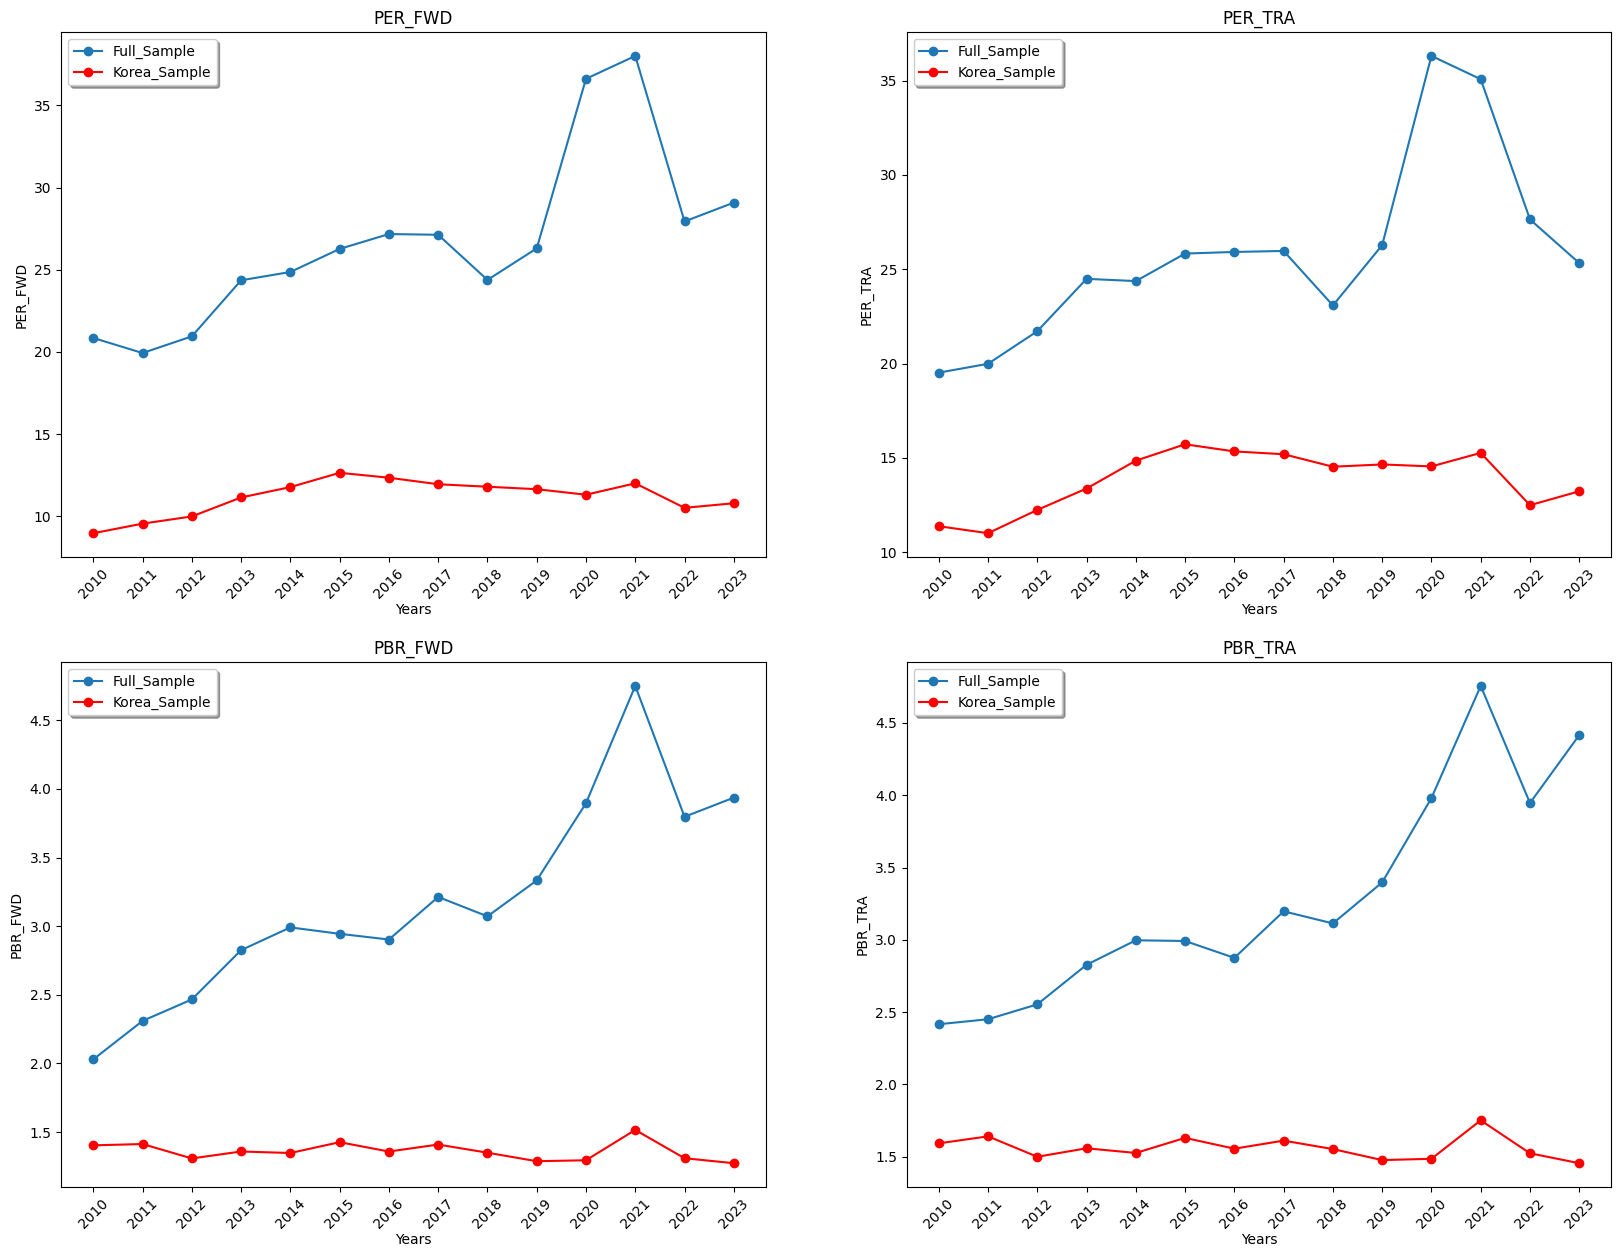

In [ ]:
#시각화
labels = ['Full_Sample','Korea_Sample']
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.plot(PER_FWD_result['PER_FWD'], marker='o')
plt.plot(K_PER_FWD_result['PER_FWD'], marker='o',color='red')
plt.xlabel('Years',labelpad=1)
plt.ylabel('PER_FWD')
plt.title('PER_FWD')
plt.legend(labels, frameon=True, shadow=True)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
plt.plot(PER_TRA_result['PER_TRA'], marker='o')
plt.plot(K_PER_TRA_result['PER_TRA'], marker='o',color='red')
plt.xlabel('Years',labelpad=1)
plt.ylabel('PER_TRA')
plt.title('PER_TRA')
plt.legend(labels, frameon=True, shadow=True)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
plt.plot(PBR_FWD_result['PBR_FWD'], marker='o')
plt.plot(K_PBR_FWD_result['PBR_FWD'], marker='o',color='red')
plt.xlabel('Years',labelpad=1)
plt.ylabel('PBR_FWD')
plt.title('PBR_FWD')
plt.legend(labels, frameon=True, shadow=True)
plt.xticks(rotation=45)

plt.subplot(2,2,4)
plt.plot(PBR_TRA_result['PBR_TRA'], marker='o')
plt.plot(K_PBR_TRA_result['PBR_TRA'], marker='o',color='red')
plt.xlabel('Years',labelpad=1)
plt.ylabel('PBR_TRA')
plt.title('PBR_TRA')
plt.legend(labels, frameon=True, shadow=True)
plt.xticks(rotation=45)

In [ ]:
#회귀분석
#Stock_PER_FWD
Stock_PER_FWD_1 = Stock_PER_FWD[Stock_PER_FWD['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]

#INF, NAN 값 제거
Stock_PER_FWD_1 = Stock_PER_FWD_1.loc[~np.isinf(Stock_PER_FWD_1['PER_FWD'])]
Stock_PER_FWD_1 = Stock_PER_FWD_1.loc[~np.isnan(Stock_PER_FWD_1['PER_FWD'])]

Stock_PER_FWD_1['r_PER_FWD'] = pd.to_numeric(Stock_PER_FWD_1['r_PER_FWD'], errors='coerce')

fit_feols = feols(fml="r_PER_FWD ~ Korea_dummy | Stock_ID + Year",data=Stock_PER_FWD_1)
fit_feols.summary()

###

Estimation:  OLS
Dep. var.: r_PER_FWD, Fixed effects: Stock_ID+Year
Inference:  CRV1
Observations:  286098

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Korea_dummy   |      0.080 |        0.012 |     6.786 |      0.000 |  0.057 |   0.103 |
---
RMSE: 0.035 R2: 0.622 R2 Within: 0.002 


In [ ]:
#회귀분석
#Stock_PER_TRA
Stock_PER_TRA_1 = Stock_PER_TRA[Stock_PER_TRA['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]

#INF, NAN 값 제거
Stock_PER_TRA_1 = Stock_PER_TRA_1.loc[~np.isinf(Stock_PER_TRA_1['PER_TRA'])]
Stock_PER_TRA_1 = Stock_PER_TRA_1.loc[~np.isnan(Stock_PER_TRA_1['PER_TRA'])]
Stock_PER_TRA_1 = Stock_PER_TRA_1.replace([np.inf, -np.inf], np.nan).dropna()

Stock_PER_TRA_1['r_PER_TRA'] = pd.to_numeric(Stock_PER_TRA_1['r_PER_TRA'], errors='coerce')

fit_feols = feols(fml="r_PER_TRA ~ Korea_dummy | Stock_ID + Year",data=Stock_PER_TRA_1)
fit_feols.summary()

###

Estimation:  OLS
Dep. var.: r_PER_TRA, Fixed effects: Stock_ID+Year
Inference:  CRV1
Observations:  259091

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Korea_dummy   |      0.046 |        0.010 |     4.575 |      0.000 |  0.026 |   0.065 |
---
RMSE: 0.034 R2: 0.572 R2 Within: 0.002 


In [ ]:
#회귀분석
#Stock_PBR_FWD
Stock_PBR_FWD_1 = Stock_PBR_FWD[Stock_PBR_FWD['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]

#INF, NAN 값 제거
Stock_PBR_FWD_1 = Stock_PBR_FWD_1.loc[~np.isinf(Stock_PBR_FWD_1['PBR_FWD'])]
Stock_PBR_FWD_1 = Stock_PBR_FWD_1.loc[~np.isnan(Stock_PBR_FWD_1['PBR_FWD'])]

Stock_PBR_FWD_1['r_PBR_FWD'] = pd.to_numeric(Stock_PBR_FWD_1['r_PBR_FWD'], errors='coerce')

fit_feols = feols(fml="r_PBR_FWD ~ Korea_dummy | Stock_ID + Year",data=Stock_PBR_FWD_1)
fit_feols.summary()

###

Estimation:  OLS
Dep. var.: r_PBR_FWD, Fixed effects: Stock_ID+Year
Inference:  CRV1
Observations:  226211

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Korea_dummy   |      0.551 |        0.097 |     5.682 |      0.000 |  0.361 |   0.741 |
---
RMSE: 0.293 R2: 0.652 R2 Within: 0.004 


In [ ]:
#회귀분석
#Stock_PBR_TRA
Stock_PBR_TRA_1 = Stock_PBR_TRA[Stock_PBR_TRA['Year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'])]

#INF, NAN 값 제거
Stock_PBR_TRA_1 = Stock_PBR_TRA_1.loc[~np.isinf(Stock_PBR_TRA_1['PBR_TRA'])]
Stock_PBR_TRA_1 = Stock_PBR_TRA_1.loc[~np.isnan(Stock_PBR_TRA_1['PBR_TRA'])]

Stock_PBR_TRA_1['r_PBR_TRA'] = pd.to_numeric(Stock_PBR_TRA_1['r_PBR_TRA'], errors='coerce')

fit_feols = feols(fml="r_PBR_TRA ~ Korea_dummy | Stock_ID + Year",data=Stock_PBR_TRA_1)
fit_feols.summary()

###

Estimation:  OLS
Dep. var.: r_PBR_TRA, Fixed effects: Stock_ID+Year
Inference:  CRV1
Observations:  207685

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5% |   97.5% |
|:--------------|-----------:|-------------:|----------:|-----------:|-------:|--------:|
| Korea_dummy   |      0.469 |        0.077 |     6.076 |      0.000 |  0.318 |   0.621 |
---
RMSE: 0.267 R2: 0.663 R2 Within: 0.003 
